## Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet201
from keras.applications.densenet import preprocess_input
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras import layers, Model
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import matplotlib
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from keras import regularizers, optimizers

## Data Visualization

Text(0.5, 1.0, 'Number of Training images per Class:')

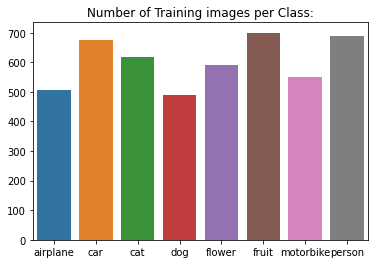

In [2]:
train_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train"
val_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/"
test_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/"
class_names = sorted(os.listdir(train_data_dir))

train_img_cat = []
val_img_cat = []
test_img_cat = []
for classes in class_names:
    train_folder = train_data_dir + '/' + classes
    train_img_cat.append(len(os.listdir(train_folder)))

for classes in class_names:
    val_folder = val_data_dir + '/' + classes
    val_img_cat.append(len(os.listdir(val_folder)))

for classes in class_names:
    test_folder = test_data_dir + '/' + classes
    test_img_cat.append(len(os.listdir(test_folder)))

sns.barplot(x=class_names, y=train_img_cat).set_title("Number of Training images per Class:")

Text(0.5, 1.0, 'Number of Validation images per Class:')

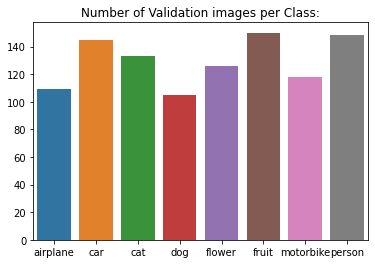

In [3]:
sns.barplot(x=class_names, y=val_img_cat).set_title("Number of Validation images per Class:")

Text(0.5, 1.0, 'Number of Testing images per Class:')

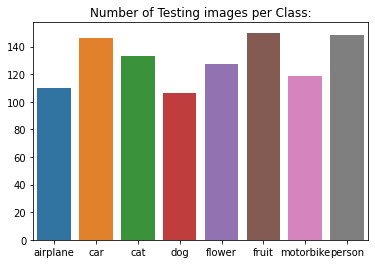

In [4]:
sns.barplot(x=class_names, y=test_img_cat).set_title("Number of Testing images per Class:")

## Data Preprocessing
## Data Augmentation

In [5]:
train = ImageDataGenerator(rescale= 1/255,
                           rotation_range=10,
                           zoom_range=0.1,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=False,
                           brightness_range=(0.9,1.1),
                           fill_mode='nearest'
                           )
val = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale= 1/255)

train_data = train.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical')
val_data = val.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/',
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/',
                                      target_size=(256,256), 
                                      shuffle = False,
                                      batch_size=32,
                                      class_mode='categorical')

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


In [ ]:
dense_net201 = DenseNet201(input_shape = (256,256,3), weights = 'imagenet', include_top = False)


In [ ]:
Dense_Net201 = Sequential()
Dense_Net201.add(dense_net201)
Dense_Net201.add(GlobalAveragePooling2D())
Dense_Net201.add(Dropout(0.5))
Dense_Net201.add(Dense(8, activation='softmax'))

learning_rate = 5e-5

Dense_Net201.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])


## Summary

In [ ]:
Dense_Net201.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 8, 8, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1920)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 15368     
Total params: 18,337,352
Trainable params: 18,108,296
Non-trainable params: 229,056
_________________________________________________________________


## Fitting the model

In [ ]:
result = Dense_Net201.fit(
    train_data,
    steps_per_epoch=10,
    epochs=5,
    validation_data=val_data
    )

Dense_Net201.save('/content/drive/MyDrive/Thesis_Natural_Images/DenseNet201.h5')

Epoch 1/5
10/10 [==============================] - 578s 58s/step - loss: 1.6818 - accuracy: 0.3844 - val_loss: 0.9521 - val_accuracy: 0.7031
Epoch 2/5
10/10 [==============================] - 581s 58s/step - loss: 0.5786 - accuracy: 0.8469 - val_loss: 0.4181 - val_accuracy: 0.9033
Epoch 3/5
10/10 [==============================] - 577s 58s/step - loss: 0.2470 - accuracy: 0.9406 - val_loss: 0.2242 - val_accuracy: 0.9487
Epoch 4/5
10/10 [==============================] - 576s 58s/step - loss: 0.1552 - accuracy: 0.9688 - val_loss: 0.1344 - val_accuracy: 0.9720
Epoch 5/5
10/10 [==============================] - 575s 57s/step - loss: 0.0814 - accuracy: 0.9812 - val_loss: 0.0902 - val_accuracy: 0.9845


## Testing

In [7]:
import keras
DN201 = keras.models.load_model('/content/drive/MyDrive/Thesis_Natural_Images/DenseNet201.h5')

In [ ]:
prediction = DN201.evaluate(test_data, batch_size = 32)
prediction

33/33 [==============================] - 207s 6s/step - loss: 0.1007 - accuracy: 0.9836


[0.10065492242574692, 0.9836381077766418]

## Model Evaluation

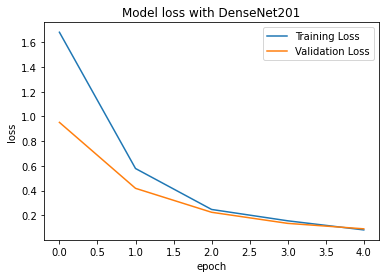

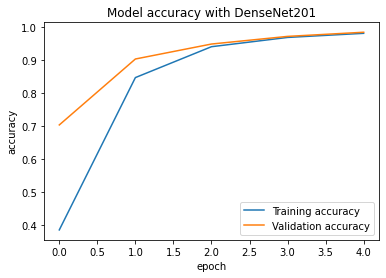

In [ ]:
# Plot.py
import matplotlib
from matplotlib import pyplot as plt

plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Model loss with DenseNet201')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(result.history['accuracy'], label='Training accuracy')
plt.plot(result.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy with DenseNet201')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Confusion Matrix

In [6]:
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
#Confution Matrix and Classification Report

Y_pred = DN201.predict(test_data, 32)
y_pred = np.argmax(Y_pred, axis=1)

In [9]:
cm = confusion_matrix(test_data.classes, y_pred)
cm_plot_labels = class_names
print(cm_plot_labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


Confusion matrix, without normalization
[[110   0   0   0   0   0   0   0]
 [  0 146   0   0   0   0   0   0]
 [  0   0 132   0   0   1   0   0]
 [  1   0   1 101   0   0   2   1]
 [  2   0   0   0 116   1   8   0]
 [  0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0 119   0]
 [  0   0   0   0   0   0   0 148]]
None


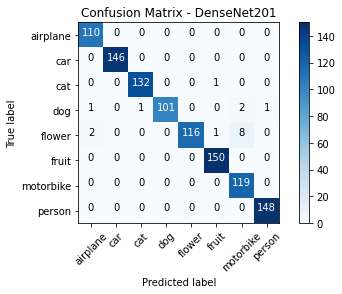

In [10]:
print(plot_confusion_matrix(cm, classes = cm_plot_labels, title='Confusion Matrix - DenseNet201', normalize=False))

## Classification Report

In [ ]:
print('Classification Report for DenseNet201')
print(classification_report(test_data.classes, y_pred, target_names=class_names))

Classification Report for DenseNet201
              precision    recall  f1-score   support

    airplane       0.97      1.00      0.99       110
         car       1.00      1.00      1.00       146
         cat       0.99      0.99      0.99       133
         dog       1.00      0.95      0.98       106
      flower       1.00      0.91      0.95       127
       fruit       0.99      1.00      0.99       150
   motorbike       0.92      1.00      0.96       119
      person       0.99      1.00      1.00       148

    accuracy                           0.98      1039
   macro avg       0.98      0.98      0.98      1039
weighted avg       0.98      0.98      0.98      1039

